# Breast Cancer Detection

## Preprocessing

* Number of instances: 569

* Number of attributes: 32

* Attribute information:
   
   1) ID number

   2) Diagnosis (M = malignant, B = benign)
3-32)


Ten real-valued features are computed for each cell nucleus:

  a) radius (mean of distances from center to points on the perimeter)

  b) texture (standard deviation of gray-scale values)

  c) perimeter

  d) area

  e) smoothness (local variation in radius lengths)

  f) compactness (perimeter^2 / area - 1.0)

  g) concavity (severity of concave portions of the contour)

  h) concave points (number of concave portions of the contour)

  i) symmetry

  j) fractal dimension ("coastline approximation" - 1)


* Missing attribute values: None

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  Import and read the breast-cancer.data.csv.
df = pd.read_csv("https://raw.githubusercontent.com/dramicos/Breast-Cancer-Detection/main/Resources/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous). We complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.
Link: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

In [3]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column id has 0 null values
Column diagnosis has 0 null values
Column radius_mean has 0 null values
Column texture_mean has 0 null values
Column perimeter_mean has 0 null values
Column area_mean has 0 null values
Column smoothness_mean has 0 null values
Column compactness_mean has 0 null values
Column concavity_mean has 0 null values
Column concave_points_mean has 0 null values
Column symmetry_mean has 0 null values
Column fractal_dimension_mean has 0 null values
Column radius_se has 0 null values
Column texture_se has 0 null values
Column perimeter_se has 0 null values
Column area_se has 0 null values
Column smoothness_se has 0 null values
Column compactness_se has 0 null values
Column concavity_se has 0 null values
Column concave_points_se has 0 null values
Column symmetry_se has 0 null values
Column fractal_dimension_se has 0 null values
Column radius_worst has 0 null values
Column texture_worst has 0 null values
Column perimeter_worst has 0 null values
Column area_worst has 0 null 

In [4]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [5]:
df.shape

(569, 32)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Choose a cutoff value and create a list of diagnosis to be replaced
# use the variable name `diagnosis_to_replace`

# Transform diagnosis
def diagnosis_to_replace(diagnosis):
    if diagnosis == "M":
        return 1
    else:
        return 0
    

df["diagnosis"] = df["diagnosis"].apply(diagnosis_to_replace)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Labels for the sections of our pie chart
labels = ["Malignant", "Benign"]

# The values of each section of the pie chart
sizes = [212, 357]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Benign" section from the others
explode = (0.1, 0)

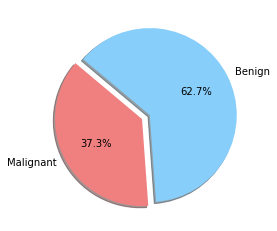

In [9]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [10]:
# Save as Image
plt.savefig('pie_malignant_vs_benign.png')

<Figure size 432x288 with 0 Axes>

In [11]:
# Split our preprocessed data into our features and target arrays also drop the id as that is not useful
X = df.drop(["diagnosis", "id"], axis='columns')
y = df["diagnosis"]
X.shape

(569, 30)

# Explore the dataset

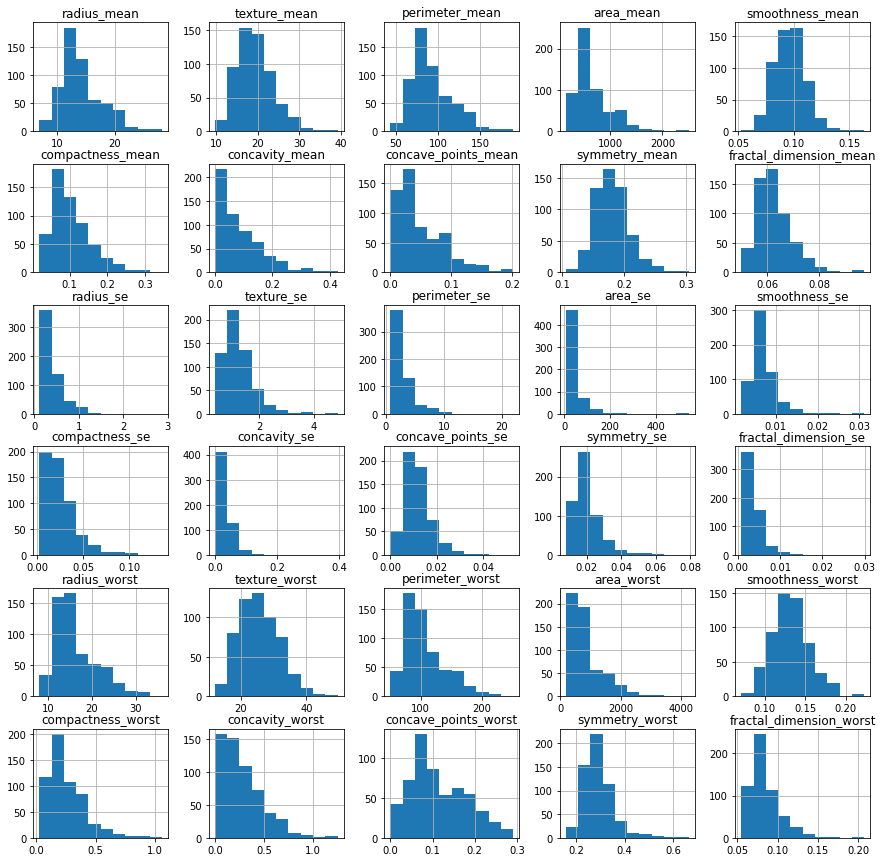

In [12]:
# A quick look at the features to see if the data is distributed normally or not
X.hist(figsize=(15,15))
plt.show()

In [13]:
# Save as Image
plt.savefig('histogram.png')

<Figure size 432x288 with 0 Axes>

There is a significant number of features that have a strong right skew, so for some models the data will need to be transformed.

## Now we choose to look at our data from an outcome point of view to see if we can get any insights.

In [14]:
benign = df.loc[df['diagnosis']==0]
benign.drop(columns=['id','diagnosis'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
benign

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [16]:
malign = df.loc[df['diagnosis']==1]
malign.drop(columns=['id','diagnosis'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
malign

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


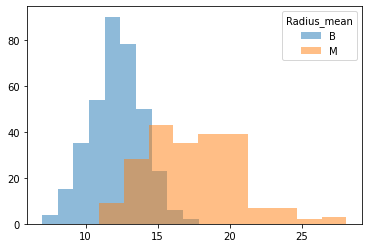

In [18]:
# have a look at how the malign data looks compared to the benign in all categories
plt.hist(benign['radius_mean'], alpha=.5, label='B')
plt.hist(malign['radius_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Radius_mean")
plt.show()

In [19]:
# Save as Image
plt.savefig('histogram_radius_mean.png')

<Figure size 432x288 with 0 Axes>

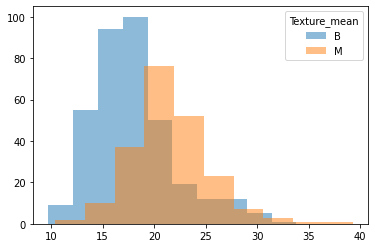

In [20]:
plt.hist(benign['texture_mean'], alpha=.5, label='B')
plt.hist(malign['texture_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Texture_mean")
plt.show()

In [21]:
# Save as Image
plt.savefig('histogram_texture_mean.png')

<Figure size 432x288 with 0 Axes>

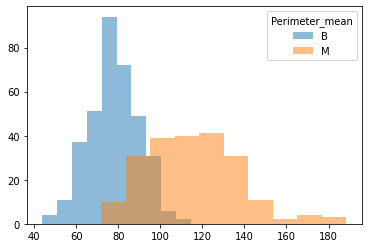

In [22]:
plt.hist(benign['perimeter_mean'], alpha=.5, label='B')
plt.hist(malign['perimeter_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Perimeter_mean")
plt.show()

In [23]:
# Save as Image
plt.savefig('histogram_perimeter_mean.png')

<Figure size 432x288 with 0 Axes>

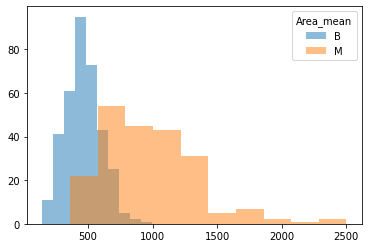

In [24]:
plt.hist(benign['area_mean'], alpha=.5, label='B')
plt.hist(malign['area_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Area_mean")
plt.show()

In [25]:
# Save as Image
plt.savefig('histogram_area_mean.png')

<Figure size 432x288 with 0 Axes>

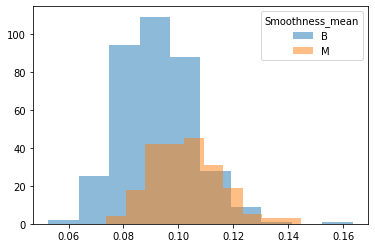

In [26]:
plt.hist(benign['smoothness_mean'], alpha=.5, label='B')
plt.hist(malign['smoothness_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Smoothness_mean")
plt.show()

In [27]:
# Save as Image
plt.savefig('histogram__smoothness_mean.png')

<Figure size 432x288 with 0 Axes>

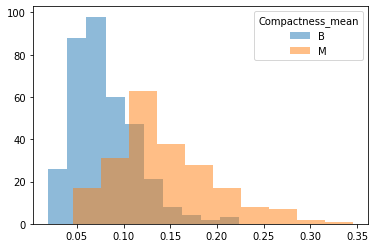

In [28]:
plt.hist(benign['compactness_mean'], alpha=.5, label='B')
plt.hist(malign['compactness_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Compactness_mean")
plt.show()

In [29]:
# Save as Image
plt.savefig('histogram_Compactness_mean.png')

<Figure size 432x288 with 0 Axes>

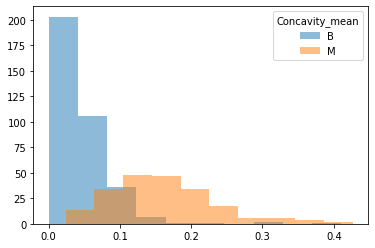

In [30]:
plt.hist(benign['concavity_mean'], alpha=.5, label='B')
plt.hist(malign['concavity_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Concavity_mean")
plt.show()

In [31]:
# Save as Image
plt.savefig('histogram_compactness_mean.png')

<Figure size 432x288 with 0 Axes>

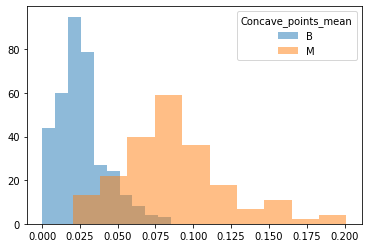

In [32]:
plt.hist(benign['concave_points_mean'], alpha=.5, label='B')
plt.hist(malign['concave_points_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Concave_points_mean")
plt.show()

In [33]:
# Save as Image
plt.savefig('histogram_concave_points_mean.png')

<Figure size 432x288 with 0 Axes>

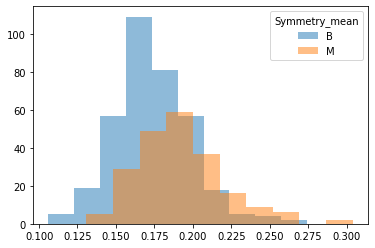

In [34]:
plt.hist(benign['symmetry_mean'], alpha=.5, label='B')
plt.hist(malign['symmetry_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Symmetry_mean")
plt.show()

In [35]:
# Save as Image
plt.savefig('histogram_symmetry_mean.png')

<Figure size 432x288 with 0 Axes>

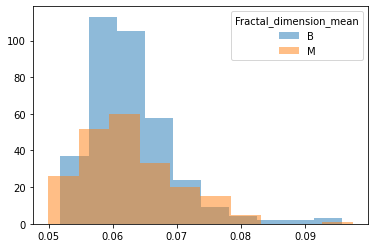

In [36]:
plt.hist(benign['fractal_dimension_mean'], alpha=.5, label='B')
plt.hist(malign['fractal_dimension_mean'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Fractal_dimension_mean")
plt.show()

In [37]:
# Save as Image
plt.savefig('histogram_fractal_dimension_mean.png')

<Figure size 432x288 with 0 Axes>

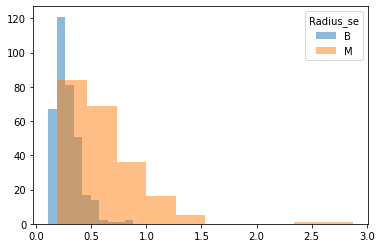

In [38]:
plt.hist(benign['radius_se'], alpha=.5, label='B')
plt.hist(malign['radius_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Radius_se")
plt.show()

In [39]:
# Save as Image
plt.savefig('histogram_radius_se.png')

<Figure size 432x288 with 0 Axes>

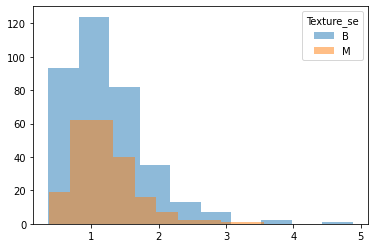

In [40]:
plt.hist(benign['texture_se'], alpha=.5, label='B')
plt.hist(malign['texture_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Texture_se")
plt.show()

In [41]:
# Save as Image
plt.savefig('histogram_texture_se.png')

<Figure size 432x288 with 0 Axes>

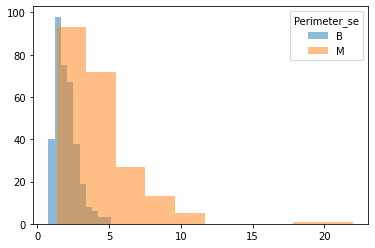

In [42]:
plt.hist(benign['perimeter_se'], alpha=.5, label='B')
plt.hist(malign['perimeter_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Perimeter_se")
plt.show()

In [43]:
# Save as Image
plt.savefig('histogram_perimeter_se.png')

<Figure size 432x288 with 0 Axes>

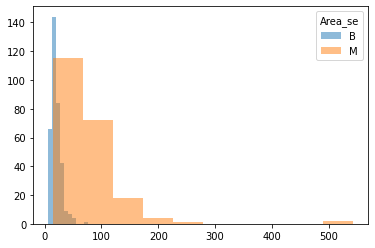

In [44]:
plt.hist(benign['area_se'], alpha=.5, label='B')
plt.hist(malign['area_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Area_se")
plt.show()

In [45]:
# Save as Image
plt.savefig('histogram_area_se.png')

<Figure size 432x288 with 0 Axes>

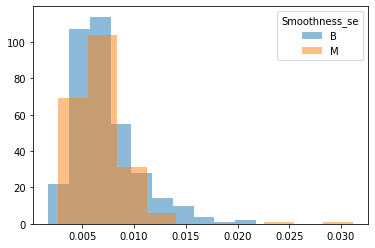

In [46]:
plt.hist(benign['smoothness_se'], alpha=.5, label='B')
plt.hist(malign['smoothness_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Smoothness_se")
plt.show()

In [47]:
# Save as Image
plt.savefig('histogram_smoothness_se.png')

<Figure size 432x288 with 0 Axes>

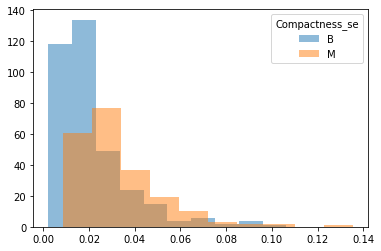

In [48]:
plt.hist(benign['compactness_se'], alpha=.5, label='B')
plt.hist(malign['compactness_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Compactness_se")
plt.show()

In [49]:
# Save as Image
plt.savefig('histogram_compactness_se.png')

<Figure size 432x288 with 0 Axes>

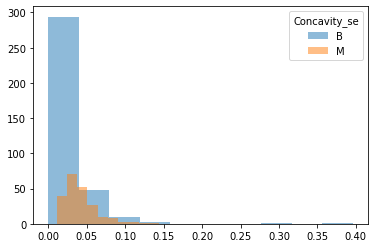

In [50]:
plt.hist(benign['concavity_se'], alpha=.5, label='B')
plt.hist(malign['concavity_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Concavity_se")
plt.show()

In [51]:
# Save as Image
plt.savefig('histogram_concavity_se.png')

<Figure size 432x288 with 0 Axes>

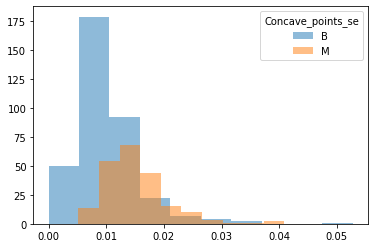

In [52]:
plt.hist(benign['concave_points_se'], alpha=.5, label='B')
plt.hist(malign['concave_points_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Concave_points_se")
plt.show()

In [53]:
# Save as Image
plt.savefig('histogram_concave_points_se.png')

<Figure size 432x288 with 0 Axes>

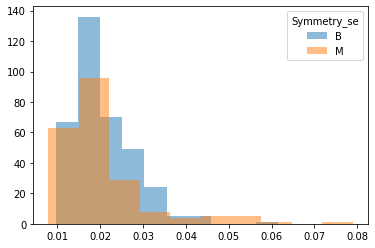

In [54]:
plt.hist(benign['symmetry_se'], alpha=.5, label='B')
plt.hist(malign['symmetry_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Symmetry_se")
plt.show()

In [55]:
# Save as Image
plt.savefig('histogram_symmetry_se.png')

<Figure size 432x288 with 0 Axes>

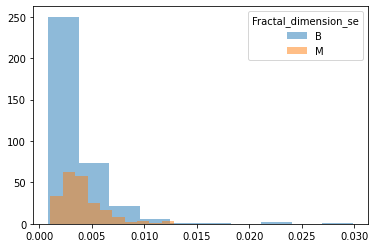

In [56]:
plt.hist(benign['fractal_dimension_se'], alpha=.5, label='B')
plt.hist(malign['fractal_dimension_se'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Fractal_dimension_se")
plt.show()

In [57]:
# Save as Image
plt.savefig('histogram_fractal_dimension_se.png')

<Figure size 432x288 with 0 Axes>

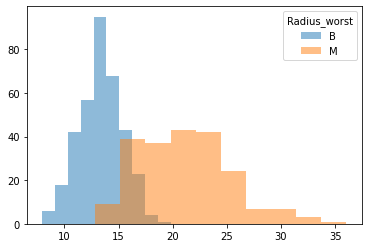

In [58]:
plt.hist(benign['radius_worst'], alpha=.5, label='B')
plt.hist(malign['radius_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Radius_worst")
plt.show()

In [59]:
# Save as Image
plt.savefig('histogram_radius_worst.png')

<Figure size 432x288 with 0 Axes>

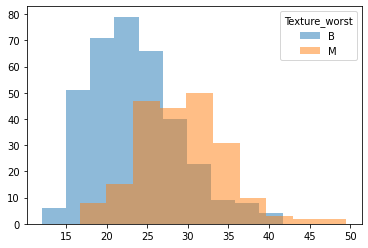

In [60]:
plt.hist(benign['texture_worst'], alpha=.5, label='B')
plt.hist(malign['texture_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Texture_worst")
plt.show()

In [61]:
# Save as Image
plt.savefig('histogram_texture_worst.png')

<Figure size 432x288 with 0 Axes>

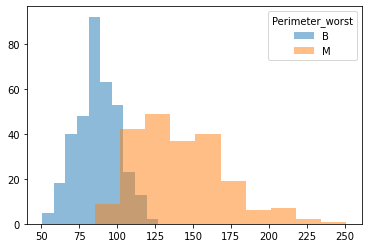

In [62]:
plt.hist(benign['perimeter_worst'], alpha=.5, label='B')
plt.hist(malign['perimeter_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Perimeter_worst")
plt.show()

In [63]:
# Save as Image
plt.savefig('histogram_perimeter_worst.png')

<Figure size 432x288 with 0 Axes>

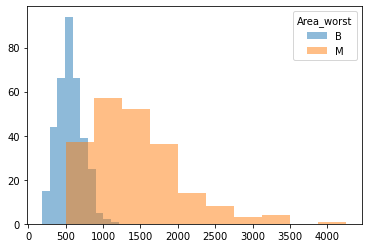

In [64]:
plt.hist(benign['area_worst'], alpha=.5, label='B')
plt.hist(malign['area_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Area_worst")
plt.show()

In [65]:
# Save as Image
plt.savefig('histogram_area_worst.png')

<Figure size 432x288 with 0 Axes>

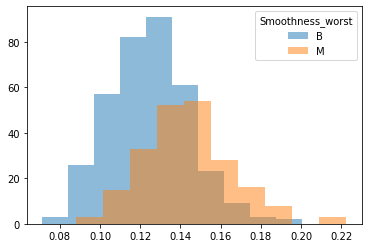

In [66]:
plt.hist(benign['smoothness_worst'], alpha=.5, label='B')
plt.hist(malign['smoothness_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Smoothness_worst")
plt.show()

In [67]:
# Save as Image
plt.savefig('histogram_smoothness_worst.png')

<Figure size 432x288 with 0 Axes>

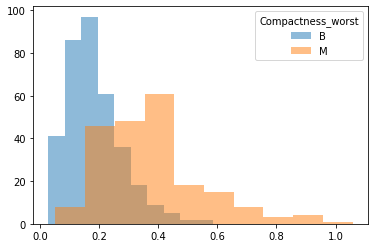

In [68]:
plt.hist(benign['compactness_worst'], alpha=.5, label='B')
plt.hist(malign['compactness_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Compactness_worst")
plt.show()

In [69]:
# Save as Image
plt.savefig('histogram_compactness_worst.png')

<Figure size 432x288 with 0 Axes>

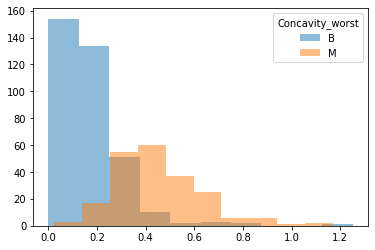

In [70]:
plt.hist(benign['concavity_worst'], alpha=.5, label='B')
plt.hist(malign['concavity_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Concavity_worst")
plt.show()

In [71]:
# Save as Image
plt.savefig('histogram_concavity_worst.png')

<Figure size 432x288 with 0 Axes>

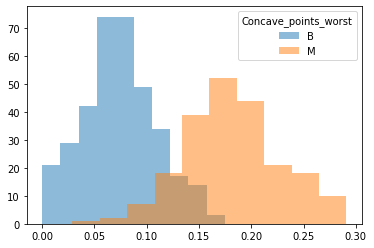

In [72]:
plt.hist(benign['concave_points_worst'], alpha=.5, label='B')
plt.hist(malign['concave_points_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Concave_points_worst")
plt.show()

In [73]:
# Save as Image
plt.savefig('histogram_concave_points_worst.png')

<Figure size 432x288 with 0 Axes>

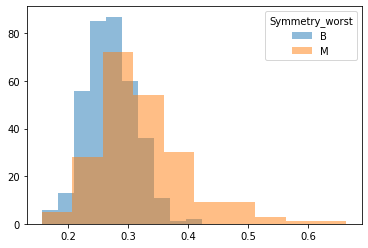

In [74]:
plt.hist(benign['symmetry_worst'], alpha=.5, label='B')
plt.hist(malign['symmetry_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Symmetry_worst")
plt.show()

In [75]:
# Save as Image
plt.savefig('histogram_symmetry_worst.png')

<Figure size 432x288 with 0 Axes>

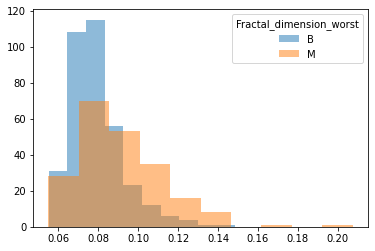

In [76]:
plt.hist(benign['fractal_dimension_worst'], alpha=.5, label='B')
plt.hist(malign['fractal_dimension_worst'], alpha=.5, label='M')
plt.legend(loc='upper right', title = "Fractal_dimension_worst")
plt.show()

In [77]:
# Save as Image
plt.savefig('histogram_fractal_dimension_worst.png')

<Figure size 432x288 with 0 Axes>

In [78]:
# We can come back to this when we want to tweak the features for improvements

In [79]:
# check for any negative values in df
(df < 0).values.any()

False

### Since the label classes are not balanced the model will have a slight bias towards detecting benign results. This can be corrected by randomly removing some of the benign results so the numbers are equal. This should help reduce the number of false negatives. The only drawback is that the more rows we remove, the less overall training the model get and thus possibly worse performance.

## Note:  Every time the next cell is run we will get different performance based on the randomness of the data that gets removed

In [80]:
# We want to create smaller datasets with a different bias

# balanced classes for no training bias
balanced_df = df.drop(   df.loc[df['diagnosis'] == 0].sample(n=(benign.shape[0] - malign.shape[0])).index ).reset_index(drop=True)

# slight bias towards malign
bias = 50
nb_df = df.drop(   df.loc[df['diagnosis'] == 0].sample(n=(benign.shape[0] - malign.shape[0] + bias)).index ).reset_index(drop=True)

In [81]:
# We now create features and labels based on these datasets with different bias
b_X = balanced_df.drop(["diagnosis", "id"], axis='columns')
b_y = balanced_df['diagnosis']

nb_X = balanced_df.drop(["diagnosis", "id"], axis='columns')
nb_y = balanced_df['diagnosis']

In [82]:
# split the different datasets: normal (positive bias), balanced and negative bias (after some exploration we found the results were best with a 31% test size)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=74, stratify=y, test_size=0.31)

b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_X, b_y, random_state=74, stratify=b_y, test_size=0.31)

nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, random_state=74, stratify=nb_y, test_size=0.31)

In [83]:
# Create a MinMaxScaler instance since all values are positive to try for better results
scaler = MinMaxScaler()

# Fit the MinMaxScaler
X_scaler = scaler.fit(X_train)
b_X_scaler = scaler.fit(b_X_train)
nb_X_scaler = scaler.fit(nb_X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

b_X_train_scaled = b_X_scaler.transform(b_X_train)
b_X_test_scaled = b_X_scaler.transform(b_X_test)

nb_X_train_scaled = nb_X_scaler.transform(nb_X_train)
nb_X_test_scaled = nb_X_scaler.transform(nb_X_test)

#### In all cases it should be noted that we got different results each time we ran the code, even with the same parameters and seeds. Without doing exhaustive testing to find the mean and variance of the performance of the models it may be hard to prove which parameters gve the best fit. As that is likely the case we will consider results that are within a say 2% to be roughly equivelant.

## Compile, Train and Evaluate the Model

# Standard Machine Learning Models

## Logistic Regression Classifier

In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1, max_iter=10000)
lr.fit(X_train_scaled, y_train)

b_lr = LogisticRegression(random_state = 1, max_iter=10000)
b_lr.fit(b_X_train_scaled, b_y_train)

nb_lr = LogisticRegression(random_state = 1, max_iter=10000)
nb_lr.fit(nb_X_train_scaled, nb_y_train)


print(f"Normal Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Normal Testing Data Score: {lr.score(X_test_scaled, y_test)}/n")

print(f"Balanced Training Data Score: {lr.score(b_X_train_scaled, b_y_train)}")
print(f"Balanced Testing Data Score: {lr.score(b_X_test_scaled, b_y_test)}/n")

print(f"Bias Training Data Score: {lr.score(nb_X_train_scaled, nb_y_train)}")
print(f"Bias Testing Data Score: {lr.score(nb_X_test_scaled, nb_y_test)}")

Normal Training Data Score: 0.9668367346938775
Normal Testing Data Score: 0.9887005649717514/n
Balanced Training Data Score: 0.9691780821917808
Balanced Testing Data Score: 0.9545454545454546/n
Bias Training Data Score: 0.9691780821917808
Bias Testing Data Score: 0.9545454545454546


Now what we are really interested in is the number of false negatives as that is the worse way to fail. As such we can look at the confusion matrix and see what percent of results are false negatives. One thing that was discovered is that the smaller dataframes are more susceptible to variation.

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
lr_y_pred = lr.predict(X_test_scaled)
b_lr_y_pred = b_lr.predict(X_test_scaled)
nb_lr_y_pred = nb_lr.predict(X_test_scaled)

In [87]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[111,   0],
       [  2,  64]])

In [88]:
# Since the method is the same we will just pick the normal dataset to see how the results are biased
tn, fp, fn, tp = confusion_matrix(y_test, lr_y_pred).ravel()

In [89]:
# Now we can see the important false negative rate
fnr = fn/(tp+fn)
print(f'False negative rate: {fnr:.4f}')

False negative rate: 0.0303


For logistic regression we found the results to be very similar for each dataset

## Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=74, n_estimators=200).fit(X_train_scaled, y_train)
b_rfc = RandomForestClassifier(random_state=74, n_estimators=200).fit(b_X_train_scaled, b_y_train)
nb_rfc = RandomForestClassifier(random_state=74, n_estimators=200).fit(nb_X_train_scaled, nb_y_train)

print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}\n')

print(f'Balanced Training Score: {b_rfc.score(b_X_train_scaled, b_y_train)}')
print(f'Balanced Testing Score: {b_rfc.score(b_X_test_scaled, b_y_test)}\n')

print(f'Bias Training Score: {nb_rfc.score(nb_X_train_scaled, nb_y_train)}')
print(f'Bias Testing Score: {nb_rfc.score(nb_X_test_scaled, nb_y_test)}\n')

Training Score: 1.0
Testing Score: 0.9717514124293786

Balanced Training Score: 1.0
Balanced Testing Score: 0.9621212121212122

Bias Training Score: 1.0
Bias Testing Score: 0.9621212121212122



In [91]:
from sklearn.utils import resample

[0.03742113 0.01859263 0.06635821 0.03953875 0.00489132 0.01299952
 0.02707985 0.10277199 0.00481738 0.00484106 0.02269132 0.00623265
 0.00964204 0.03900798 0.00597935 0.00475882 0.0092316  0.00376884
 0.00491827 0.00690999 0.12475161 0.02195189 0.15508198 0.10489169
 0.01203606 0.01355003 0.03352138 0.08800062 0.00740679 0.00635525]


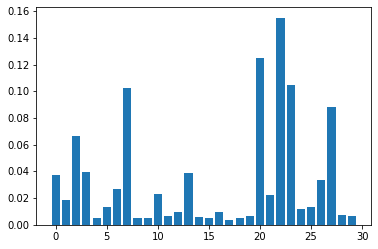

In [92]:
# bar-graph for rfc 
features = rfc.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [93]:
# Save piechart as Image
plt.savefig('v_bargraph_random_forest_classifier_rfc.png')

<Figure size 432x288 with 0 Axes>

In [94]:
# feature_importances = rfc.feature_importances_

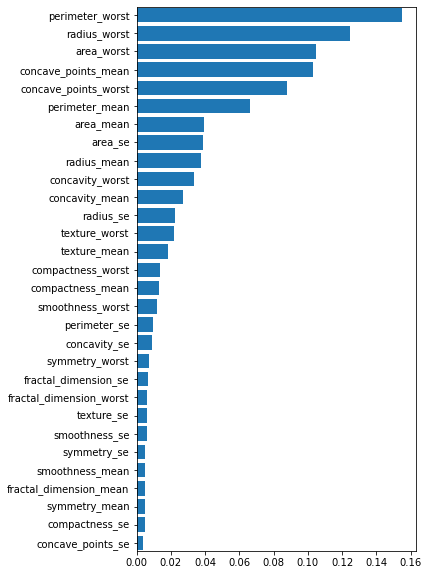

In [95]:
features = sorted(zip(X.columns, rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5, 10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [96]:
# Save piechart as Image
plt.savefig('h_bargraph_random_forest_classifier_rfc.png')

<Figure size 432x288 with 0 Axes>

[0.04529923 0.01395948 0.05086211 0.04609913 0.00292375 0.01719035
 0.04709921 0.10634812 0.00284463 0.00511153 0.00885987 0.00474995
 0.01159416 0.02540572 0.00575796 0.00354276 0.00350629 0.00385309
 0.00469026 0.00448142 0.10689147 0.02426484 0.16338905 0.1126352
 0.00803358 0.01344262 0.02763292 0.11219425 0.00873159 0.00860546]


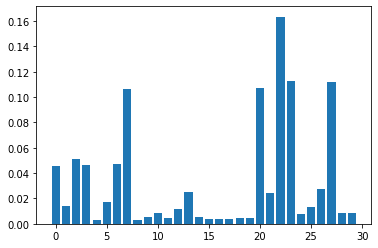

In [97]:
# bar-graph for b_rfc
features = b_rfc.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [98]:
# Save piechart as Image
plt.savefig('v_bargraph_random_forest_classifier_b_rfc.png')

<Figure size 432x288 with 0 Axes>

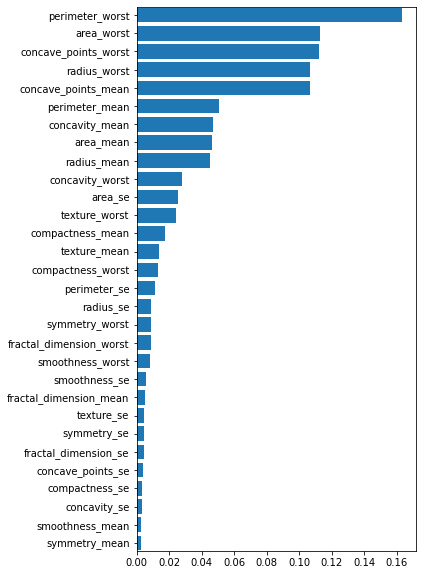

In [99]:
features = sorted(zip(X.columns, b_rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5, 10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [100]:
# Save piechart as Image
plt.savefig('h_bargraph_random_forest_classifier_b_rfc.png')

<Figure size 432x288 with 0 Axes>

[0.04529923 0.01395948 0.05086211 0.04609913 0.00292375 0.01719035
 0.04709921 0.10634812 0.00284463 0.00511153 0.00885987 0.00474995
 0.01159416 0.02540572 0.00575796 0.00354276 0.00350629 0.00385309
 0.00469026 0.00448142 0.10689147 0.02426484 0.16338905 0.1126352
 0.00803358 0.01344262 0.02763292 0.11219425 0.00873159 0.00860546]


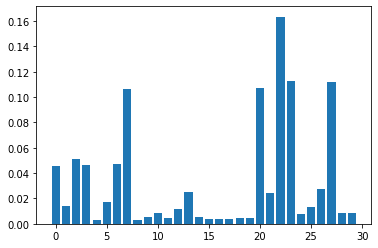

In [101]:
# bar-graph for nb_rfc 
features = nb_rfc.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [102]:
# Save piechart as Image
plt.savefig('v_bargraph_random_forest_classifier_nb_rfc.png')

<Figure size 432x288 with 0 Axes>

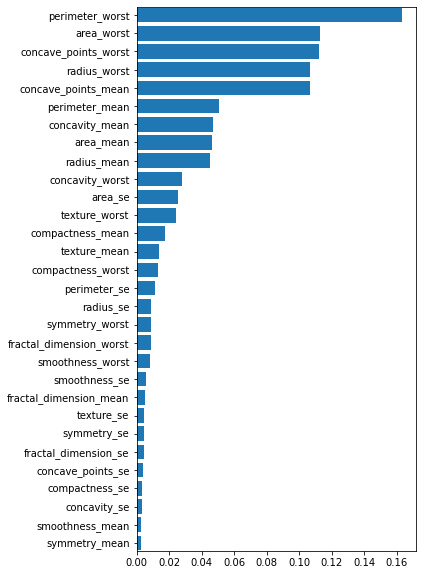

In [103]:
features = sorted(zip(X.columns, nb_rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5, 10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [104]:
# Save piechart as Image
plt.savefig('h_bargraph_random_forest_classifier_nb_rfc.png')

<Figure size 432x288 with 0 Axes>

In [105]:
y_pred = rfc.predict(X_test_scaled)
b_y_pred = b_rfc.predict(b_X_test_scaled)
nb_y_pred = nb_rfc.predict(nb_X_test_scaled)

In [106]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

b_cm = confusion_matrix(b_y_test, b_y_pred)
btn, bfp, bfn, btp = confusion_matrix(b_y_test, b_y_pred).ravel()

nb_cm = confusion_matrix(nb_y_test, nb_y_pred)
nbtn, nbfp, nbfn, nbtp = confusion_matrix(nb_y_test, nb_y_pred).ravel()

#### This time we will look at all the biases between all the datasets

In [107]:
# Sensitivity, hit rate, recall, or true positive rate
tpr = tp/(tp+fn)
btpr = btp/(btp+bfn)
nbtpr = nbtp/(nbtp+nbfn)

# Specificity or true negative rate
tnr = tn/(tn+fp) 
btnr = btn/(btn+bfp) 
nbtnr = nbtn/(nbtn+nbfp)

# Precision or positive predictive value
ppv = tp/(tp+fp)
bppv = btp/(btp+bfp)
nbppv = nbtp/(nbtp+nbfp)

# Negative predictive value
npv = tn/(tn+fn)
bnpv = btn/(btn+bfn)
nbnpv = nbtn/(nbtn+nbfn)

# Fall out or false positive rate
fpr = fp/(fp+tn)
bfpr = bfp/(bfp+btn)
nbfpr = nbfp/(nbfp+nbtn)

# False negative rate
fnr = fn/(tp+fn)
bfnr = bfn/(btp+bfn)
nbfnr = nbfn/(nbtp+nbfn)

# False discovery rate
fdr = fp/(tp+fp)
bfdr = bfp/(btp+bfp)
nbfdr = nbfp/(nbtp+nbfp)

# Overall accuracy
acc = (tp+tn)/(tp+fp+fn+tn)
bacc = (btp+btn)/(btp+bfp+bfn+btn)
nbacc = (nbtp+nbtn)/(nbtp+nbfp+nbfn+nbtn)


In [108]:
print(f'True positive rates: {tpr:.4f} b: {btpr:.4f} nb: {nbtpr:.4f}')
print(f'True negative rates: {tnr:.4f} b: {btnr:.4f} nb: {nbtnr:.4f}')
print(f'Positive predictive values: {ppv:.4f} b: {bppv:.4f} nb: {nbppv:.4f}')
print(f'Negative predictive values: {npv:.4f} b: {bnpv:.4f} nb: {nbnpv:.4f}')
print(f'False positive rates: {fpr:.4f} b: {bfpr:.4f} nb: {nbfpr:.4f}')
print(f'False negative rates: {fnr:.4f} b: {bfnr:.4f} nb: {nbfnr:.4f}')
print(f'False discovery rates: {fdr:.4f} b: {bfdr:.4f} nb: {nbfdr:.4f}')
print(f'Overall Accuracies: {acc:.4f} b: {bacc:.4f} nb: {nbacc:.4f}')

True positive rates: 0.9697 b: 0.9697 nb: 0.9697
True negative rates: 0.9730 b: 0.9545 nb: 0.9545
Positive predictive values: 0.9552 b: 0.9552 nb: 0.9552
Negative predictive values: 0.9818 b: 0.9692 nb: 0.9692
False positive rates: 0.0270 b: 0.0455 nb: 0.0455
False negative rates: 0.0303 b: 0.0303 nb: 0.0303
False discovery rates: 0.0448 b: 0.0448 nb: 0.0448
Overall Accuracies: 0.9718 b: 0.9621 nb: 0.9621


## K Nearest Neighbors Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
# Loop through different k values to find which has the highest accuracy
train_scores = []
btrain_scores = []
nbtrain_scores = []
test_scores = []
btest_scores = []
nbtest_scores = []


for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    bknn = KNeighborsClassifier(n_neighbors=k)
    nbknn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_scaled, y_train)
    bknn.fit(b_X_train_scaled, b_y_train)
    nbknn.fit(nb_X_train_scaled, nb_y_train)

    train_score = knn.score(X_train_scaled, y_train)
    btrain_score = bknn.score(b_X_train_scaled, b_y_train)
    nbtrain_score = nbknn.score(nb_X_train_scaled, nb_y_train)

    test_score = knn.score(X_test_scaled, y_test)
    btest_score = bknn.score(b_X_test_scaled, b_y_test)
    nbtest_score = nbknn.score(nb_X_test_scaled, nb_y_test)
    
    train_scores.append(train_score)
    btrain_scores.append(btrain_score)
    nbtrain_scores.append(nbtrain_score)

    test_scores.append(test_score)
    btest_scores.append(btest_score)
    nbtest_scores.append(nbtest_score)


    print(f"k: {k}, Train/Test Score: {train_score:.4f}/{test_score:.4f}")
    print(f"k: {k}, bTrain/bTest Score: {btrain_score:.4f}/{btest_score:.4f}")
    print(f"k: {k}, nbTrain/nbTest Score: {nbtrain_score:.4f}/{nbtest_score:.4f}\n")

k: 1, Train/Test Score: 1.0000/0.9718
k: 1, bTrain/bTest Score: 1.0000/0.9697
k: 1, nbTrain/nbTest Score: 1.0000/0.9697

k: 3, Train/Test Score: 0.9796/0.9887
k: 3, bTrain/bTest Score: 0.9829/0.9621
k: 3, nbTrain/nbTest Score: 0.9829/0.9621

k: 5, Train/Test Score: 0.9719/0.9831
k: 5, bTrain/bTest Score: 0.9795/0.9470
k: 5, nbTrain/nbTest Score: 0.9795/0.9470

k: 7, Train/Test Score: 0.9719/0.9831
k: 7, bTrain/bTest Score: 0.9795/0.9394
k: 7, nbTrain/nbTest Score: 0.9795/0.9394

k: 9, Train/Test Score: 0.9745/0.9831
k: 9, bTrain/bTest Score: 0.9795/0.9470
k: 9, nbTrain/nbTest Score: 0.9795/0.9470

k: 11, Train/Test Score: 0.9745/0.9831
k: 11, bTrain/bTest Score: 0.9555/0.9318
k: 11, nbTrain/nbTest Score: 0.9555/0.9318

k: 13, Train/Test Score: 0.9770/0.9774
k: 13, bTrain/bTest Score: 0.9555/0.9394
k: 13, nbTrain/nbTest Score: 0.9555/0.9394

k: 15, Train/Test Score: 0.9719/0.9718
k: 15, bTrain/bTest Score: 0.9521/0.9394
k: 15, nbTrain/nbTest Score: 0.9521/0.9394

k: 17, Train/Test Score

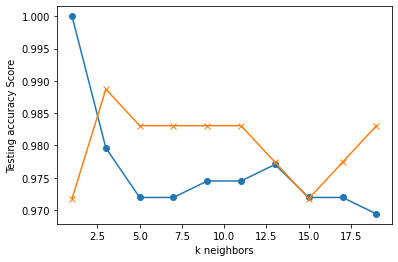

In [111]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [112]:
# Save piechart as Image
plt.savefig('multi_line_graph_kneighbor.png')

<Figure size 432x288 with 0 Axes>

In [113]:
# Looks like k = 3 is best with the normal (larger dataset) 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.4f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.9887


In [114]:
y_pred_knn = knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[110,   1],
       [  1,  65]])

In [115]:
ktn, kfp, kfn, ktp = confusion_matrix(y_test, y_pred_knn).ravel()

kfnr = kfn/(ktp+kfn)

print(f'False negative rate: {kfnr:.4f}')

False negative rate: 0.0152


This shows that knn performed as well as the balanced random forest in both accuracy and false negative rate.

## C-Support Vector Classification

In [116]:
from sklearn.svm import SVC

lsvc = SVC(kernel='linear').fit(X_train, y_train)
psvc2 = SVC(kernel='poly', degree=2).fit(X_train, y_train)
psvc3 = SVC(kernel='poly', degree=3).fit(X_train, y_train)
psvc8 = SVC(kernel='poly', degree=8).fit(X_train, y_train)
psvc9 = SVC(kernel='poly', degree=9).fit(X_train, y_train)
gsvc = SVC(kernel='rbf').fit(X_train, y_train)
ssvc = SVC(kernel='sigmoid').fit(X_train, y_train)


In [117]:
y_pred_l = lsvc.predict(X_test)
y_pred_p2 = psvc2.predict(X_test)
y_pred_p3 = psvc3.predict(X_test)
y_pred_p8 = psvc8.predict(X_test)
y_pred_p9 = psvc9.predict(X_test)
y_pred_g = gsvc.predict(X_test)
y_pred_s = ssvc.predict(X_test)

In [118]:
# for a quicker summary (though without the false negative rate) we can use a classification report.
# This can save time in deciding if a model is worth further investigation.

from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_test, y_pred_l))
print(classification_report(y_test, y_pred_p2))
print(classification_report(y_test, y_pred_p3))
print(classification_report(y_test, y_pred_p8))
print(classification_report(y_test, y_pred_p9))
print(classification_report(y_test, y_pred_g))
print(classification_report(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       111
           1       0.97      0.97      0.97        66

    accuracy                           0.98       177
   macro avg       0.98      0.98      0.98       177
weighted avg       0.98      0.98      0.98       177

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       111
           1       0.98      0.76      0.85        66

    accuracy                           0.90       177
   macro avg       0.93      0.87      0.89       177
weighted avg       0.91      0.90      0.90       177

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       111
           1       0.96      0.76      0.85        66

    accuracy                           0.90       177
   macro avg       0.92      0.87      0.89       177
weighted avg       0.91      0.90      0.90       177

              preci

In [120]:
# # Fit to the training data, and validate with the testing data
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)

In [121]:
X_train.sample(n=2, axis=1).iloc[:,0]

211    1.444
87     3.055
124    1.223
393    4.158
436    2.597
       ...  
337    4.369
127    5.216
148    2.120
260    2.587
505    1.787
Name: perimeter_se, Length: 392, dtype: float64

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


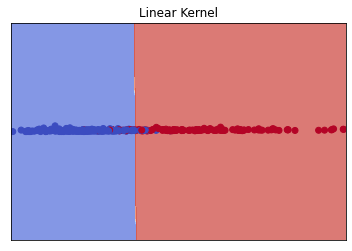

In [122]:
# If we reduce the data down and randomly select only 2 features so we can see how this looks
sX = X_train.sample(n=2, axis=1)
slsvc = SVC(kernel='linear').fit(sX, y_train)

# mesh step size
h = .1

# create mesh to plot in
x_min, x_max = sX.iloc[:, 0].min() - 1, sX.iloc[:, 0].max() + 1
y_min, y_max = sX.iloc[:, 1].min() - 1, sX.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# xx, yy = np.mgrid[x_min:x_max, y_min:y_max]
Z = slsvc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(sX.iloc[:, 0], sX.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Linear Kernel')
plt.show()

# Dimension Reduction and unsupervised Model

In [123]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [124]:
# First we reduce the dimensionality (we will first try cutting it in half)
pca = PCA(n_components=15)

In [125]:
X_scale = scaler.fit(X)
X_scaled = X_scale.transform(X)
pca_X = pca.fit_transform(X_scaled)

In [126]:
# We want to look at a few parameters of t-sne to optimize since it can be sensitive to perplexity based on data density - we also only want to see 2 dimensions
tsne = TSNE(n_components=2, perplexity=15, n_iter=1000, learning_rate=150)

In [127]:
pca_X.shape

(569, 15)

In [128]:
tsne_features = tsne.fit_transform(pca_X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


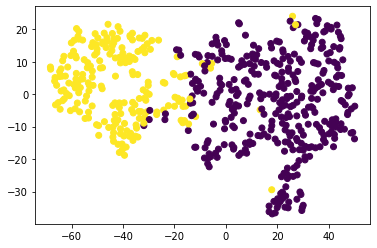

In [129]:
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=y)
plt.show()

In [130]:
# Save piechart as Image
plt.savefig('scatter_tsne.png')

<Figure size 432x288 with 0 Axes>

In [131]:
# We can now see how well kmeans can tell the data apart.  Since it is a binary test we can only have 2 clusters though.
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=74)
km.fit(pca_X)
cluster_pred = km.predict(pca_X)

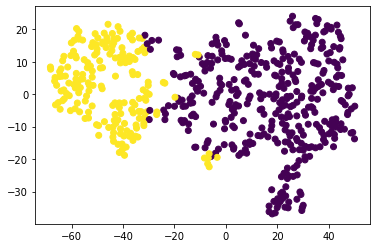

In [132]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=cluster_pred)
plt.show()

In [133]:
# Save piechart as Image
plt.savefig('scatter_tsne_cluster.png')

<Figure size 432x288 with 0 Axes>

In [134]:
pca.explained_variance_ratio_

array([0.53097689, 0.1728349 , 0.07114442, 0.06411259, 0.04086072,
       0.03071494, 0.01580837, 0.01191472, 0.00988429, 0.00945446,
       0.00849397, 0.00757976, 0.00656638, 0.00474811, 0.00269423])

In [135]:
sum = 0

for i in pca.explained_variance_ratio_:
  sum += i

# here we can see that the 15 variables account for almost 99% of the variance
print(sum)

0.9877887652523308


In [136]:
print(classification_report(y, cluster_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       357
           1       0.95      0.85      0.90       212

    accuracy                           0.93       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.93      0.93       569



In [137]:
from sklearn.cluster import KMeans

In [138]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=3, random_state=5)

# Get 3 principal components for the iris data.
breast_pca = pca.fit_transform(balanced_df)

In [139]:
# Transform PCA data to a DataFrame
balanced_df = pd.DataFrame(
    data=breast_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],
)
balanced_df.head()

,principal component 1,principal component 2,principal component 3
0,-2.718932e+07,1051.247906,-290.977015
1,-2.718910e+07,1159.459878,17.633033
2,5.626929e+07,809.796243,43.659961
3,5.631668e+07,-592.969693,-66.080313
4,5.632678e+07,743.932817,193.700157


In [140]:
# Initialzie the K-Means model
model = KMeans(n_clusters=3, random_state=5)

In [141]:
# Fit the model
model.fit(balanced_df)

KMeans(n_clusters=3, random_state=5)

In [142]:
# Prediction Clusters
predictions = model.predict(balanced_df)
print(predictions)

[0 0 2 2 2 0 0 2 0 2 0 2 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 2 0 0 2 0 2
 2 0 0 2 2 0 2 0 0 2 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 2 2 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [143]:
# Add the predicted class columns
balanced_df["class"] = model.labels_
balanced_df.head()

,principal component 1,principal component 2,principal component 3,class
0,-2.718932e+07,1051.247906,-290.977015,0
1,-2.718910e+07,1159.459878,17.633033,0
2,5.626929e+07,809.796243,43.659961,2
3,5.631668e+07,-592.969693,-66.080313,2
4,5.632678e+07,743.932817,193.700157,2


In [144]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([1.00000000e+00, 3.70048156e-11, 6.94603073e-13])

In [145]:
# Plot the 3 principal components
import plotly.express as px
fig = px.scatter_3d(
    balanced_df,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color ="class",
    symbol="class",
    width=800)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [146]:
# Save as Image
plt.savefig('pca_3d_principle_plot.png')

<Figure size 432x288 with 0 Axes>

# Neural Net approach

#### Use Keras-Tuner to find best parameters to optimize the model

In [147]:
# Create a method that creates a new Sequential model with hyperparameter options:  method based off of class activities
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow keras-tuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','selu'])
    
    # Allow keras-tuner to decide number of neurons in first layer
    # Input dimensions set to X_train_scaled.shape[1] to be automatically set to the number of features(columns)
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=16,
        max_value=320,
        step=16), activation=activation, input_dim=X_train_scaled.shape[1]))

    # Allow keras-tuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=16,
            max_value=160,
            step=16),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    # Compile the model
    nn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy', tf.keras.metrics.FalseNegatives(thresholds=0)])
    
    return nn_model

In [148]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
# Import the keras-tuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    overwrite=True,
    objective="val_accuracy",
    factor=3,
    max_epochs=50,
    hyperband_iterations=2)

# Warning:  The next step can take up to 10 minutes.

In [150]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [151]:
# Run the keras-tuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=30,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 00m 06s]
val_accuracy: 0.994350254535675

Best val_accuracy So Far: 0.994350254535675
Total elapsed time: 00h 08m 23s


In [152]:
tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

{'activation': 'relu',
 'first_units': 304,
 'num_layers': 3,
 'units_0': 48,
 'learning_rate': 0.01,
 'units_1': 96,
 'units_2': 112,
 'units_3': 96,
 'units_4': 128,
 'tuner/epochs': 6,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [153]:
# Save the best hyperparameters from the search to put into the model
best_hp = tuner.get_best_hyperparameters()[0]

In [154]:
# Define the model using the parameters from the tuner
best_model = tuner.hypermodel.build(best_hp)
# Check the structure of the model
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 304)               9424      
                                                                 
 dense_8 (Dense)             (None, 48)                14640     
                                                                 
 dense_9 (Dense)             (None, 96)                4704      
                                                                 
 dense_10 (Dense)            (None, 112)               10864     
                                                                 
 dense_11 (Dense)            (None, 1)                 113       
                                                                 
Total params: 39,745
Trainable params: 39,745
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Train the model
fit_model = best_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.7577 - false_negatives_1: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2618 - accuracy: 0.8903 - false_negatives_1: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2068 - accuracy: 0.9209 - false_negatives_1: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1430 - accuracy: 0.9490 - false_negatives_1: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0834 - accuracy: 0.9694 - false_negatives_1: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1148 - accuracy: 0.9617 - false_negatives_1: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1811 - accuracy: 0.9158 - false_negatives_1: 0.0000e+00
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0962 - a

In [156]:
# Evaluate the model using the test data
model_loss, model_accuracy, fn = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy*100} %, False Negative Rate: {fn} %")

6/6 - 1s - loss: 0.1070 - accuracy: 0.9831 - false_negatives_1: 0.0000e+00 - 512ms/epoch - 85ms/step
Loss: 0.10695911198854446, Accuracy: 98.30508232116699 %, False Negative Rate: 0.0 %


## We were able to get the best results with the neural network by getting the highest accuracy and lowest false negative rate